# Traitement des datas

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

In [45]:
fichier = open('epsilon_11_31_33.txt', 'r')

In [46]:
char = fichier.read()

In [47]:
char_split = char.split('# ===')

In [48]:
char_split = char_split[1:]

In [49]:
char_split = ['# ===' + x for x in char_split]

In [50]:
time = [float(x.split('\n')[0][13:]) for x in char_split]

In [51]:
char_split = [x.split('\n', maxsplit = 1) for x in char_split]

In [52]:
char_split[0][1][2:250]

'node  X  Y  Z  gpeto11  gpeto31  gpeto33  \n31  2.7125294759e+01  9.8466824182e+00  -6.7850000000e+01  4.9105525250e-04  4.8373063328e-04  1.1178031564e-03  \n33  -2.7347095966e+01  9.5813266371e+00  -6.7850000000e+01  1.3093696907e-03  -5.6671898346'

In [53]:
doc = [x[1][2:] for x in char_split]

In [17]:
len(doc[0])

6480147

In [18]:
len(doc[1])

6480216

In [19]:
for k in range(len(doc)): 
    with open('time' + str(k) + '.txt', 'w') as file : 
        file.write(doc[k])

In [27]:
df = pd.read_csv('time1.txt', sep = '  ')

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_1288/3856340900.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('time1.txt', sep = '  ')


FileNotFoundError: [Errno 2] No such file or directory: 'time1.txt'

In [37]:
lst_df = []
for k in range(28):
    lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separa

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separa

In [39]:
df = pd.concat(lst_df)
df

,node,X,Y,Z,gpeto11,gpeto31,gpeto33
0,31,27.125295,9.846682,-67.850000,0.000491,0.000484,0.001118
1,33,-27.347096,9.581327,-67.850000,0.001309,-0.000567,0.001440
2,43,-19.868158,5.895601,-65.438903,0.000579,-0.000107,0.002184
3,44,-17.509594,4.952852,-62.898903,0.000725,-0.000105,0.001752
4,45,-19.868158,5.895601,-61.628903,0.000603,-0.000065,0.002039
...,...,...,...,...,...,...,...
54227,2342475,26.816913,9.616926,-14.061950,-0.000032,0.000032,0.000055
54228,2342476,26.816913,9.616926,-13.801228,-0.000031,0.000032,0.000054
54229,2342523,22.057412,6.361321,-53.767238,0.000767,-0.000088,-0.000349
54230,2342524,21.613723,6.105231,-53.965790,0.000524,-0.000087,-0.000284


In [40]:
nodes = df['node'].unique()

In [41]:
by_nodes = {}

In [43]:
for node in nodes : 
    aux = df[df['node'] == node].copy()
    aux['time'] = time
    aux = aux.drop(['node','X', 'Y', 'Z'], axis = 1)
    aux.set_index('time', inplace = True)
    aux['epsilon_'+ str(node)] = 1/2*(aux['gpeto11'] +aux['gpeto33'] + np.sqrt(np.square(aux['gpeto11'] - aux['gpeto33']) + 4*np.square(aux['gpeto31']) ))
    by_nodes[str(node)] = aux

NameError: name 'time' is not defined

In [317]:
nodes_str = list(by_nodes.keys())

<AxesSubplot:xlabel='time'>

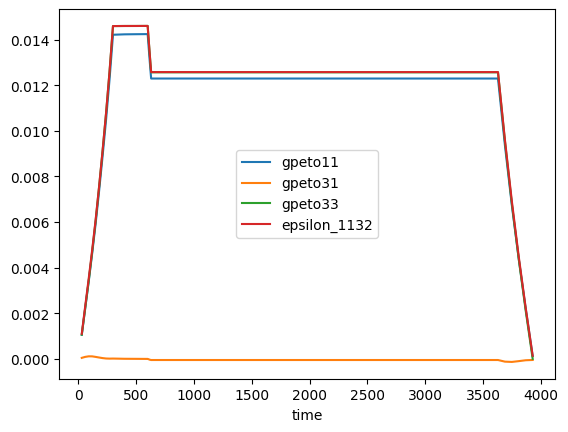

In [318]:
by_nodes[nodes_str[520]].plot()

In [319]:
len(nodes)

54232

In [334]:
test

time,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,300.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
epsilon_31,0.001381,0.002936,0.004601,0.006681,0.010590,0.016683,0.022709,0.028125,0.033974,0.04075,...,0.039911,0.039912,0.039912,0.039912,0.039912,0.036154,0.032024,0.025721,0.018334,0.011430
epsilon_33,0.001945,0.004156,0.006397,0.009004,0.011478,0.014675,0.020829,0.026554,0.032728,0.03996,...,0.037888,0.037888,0.037888,0.037887,0.037887,0.032482,0.026983,0.022052,0.017714,0.014127


In [337]:
lst_eps = []

In [338]:
for node in nodes_str:
    lst_eps.append(by_nodes[node].copy().drop(['gpeto11','gpeto31', 'gpeto33'], axis = 1).transpose())

In [339]:
df_eps = pd.concat(lst_eps)

In [346]:
df_eps

time,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,300.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
epsilon_31,0.001381,0.002936,0.004601,0.006681,0.010590,0.016683,0.022709,0.028125,0.033974,0.040750,...,0.039911,0.039912,0.039912,0.039912,0.039912,0.036154,0.032024,0.025721,0.018334,0.011430
epsilon_33,0.001945,0.004156,0.006397,0.009004,0.011478,0.014675,0.020829,0.026554,0.032728,0.039960,...,0.037888,0.037888,0.037888,0.037887,0.037887,0.032482,0.026983,0.022052,0.017714,0.014127
epsilon_43,0.002191,0.004675,0.007056,0.009447,0.011824,0.014021,0.016233,0.018997,0.021656,0.024301,...,0.019458,0.019458,0.019458,0.019458,0.019458,0.013356,0.008043,0.004115,0.002831,0.001372
epsilon_44,0.001763,0.003763,0.005622,0.007351,0.008987,0.010551,0.012098,0.013961,0.016068,0.018660,...,0.014890,0.014891,0.014892,0.014892,0.014892,0.009960,0.006351,0.004446,0.002659,0.000822
epsilon_45,0.002042,0.004384,0.006683,0.009056,0.011470,0.013742,0.016055,0.018649,0.021334,0.024740,...,0.020268,0.020266,0.020265,0.020265,0.020265,0.014261,0.008865,0.004630,0.001712,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
epsilon_2342475,0.001128,0.002374,0.003603,0.004883,0.006219,0.007688,0.009240,0.010877,0.012730,0.014802,...,0.012697,0.012697,0.012697,0.012697,0.012697,0.009548,0.006790,0.004369,0.002162,0.000066
epsilon_2342476,0.001128,0.002374,0.003603,0.004884,0.006221,0.007691,0.009244,0.010882,0.012737,0.014811,...,0.012705,0.012705,0.012705,0.012705,0.012705,0.009553,0.006793,0.004371,0.002163,0.000065
epsilon_2342523,0.001062,0.002274,0.003484,0.004767,0.006122,0.007580,0.009125,0.010755,0.012478,0.014277,...,0.012163,0.012163,0.012163,0.012163,0.012163,0.009099,0.006337,0.004410,0.002597,0.000774
epsilon_2342524,0.001051,0.002250,0.003450,0.004725,0.006074,0.007530,0.009076,0.010706,0.012435,0.014238,...,0.012153,0.012153,0.012153,0.012153,0.012153,0.009116,0.006380,0.004360,0.002442,0.000533


In [438]:
model = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter = 10)
prediction = model.fit_predict(df_eps)

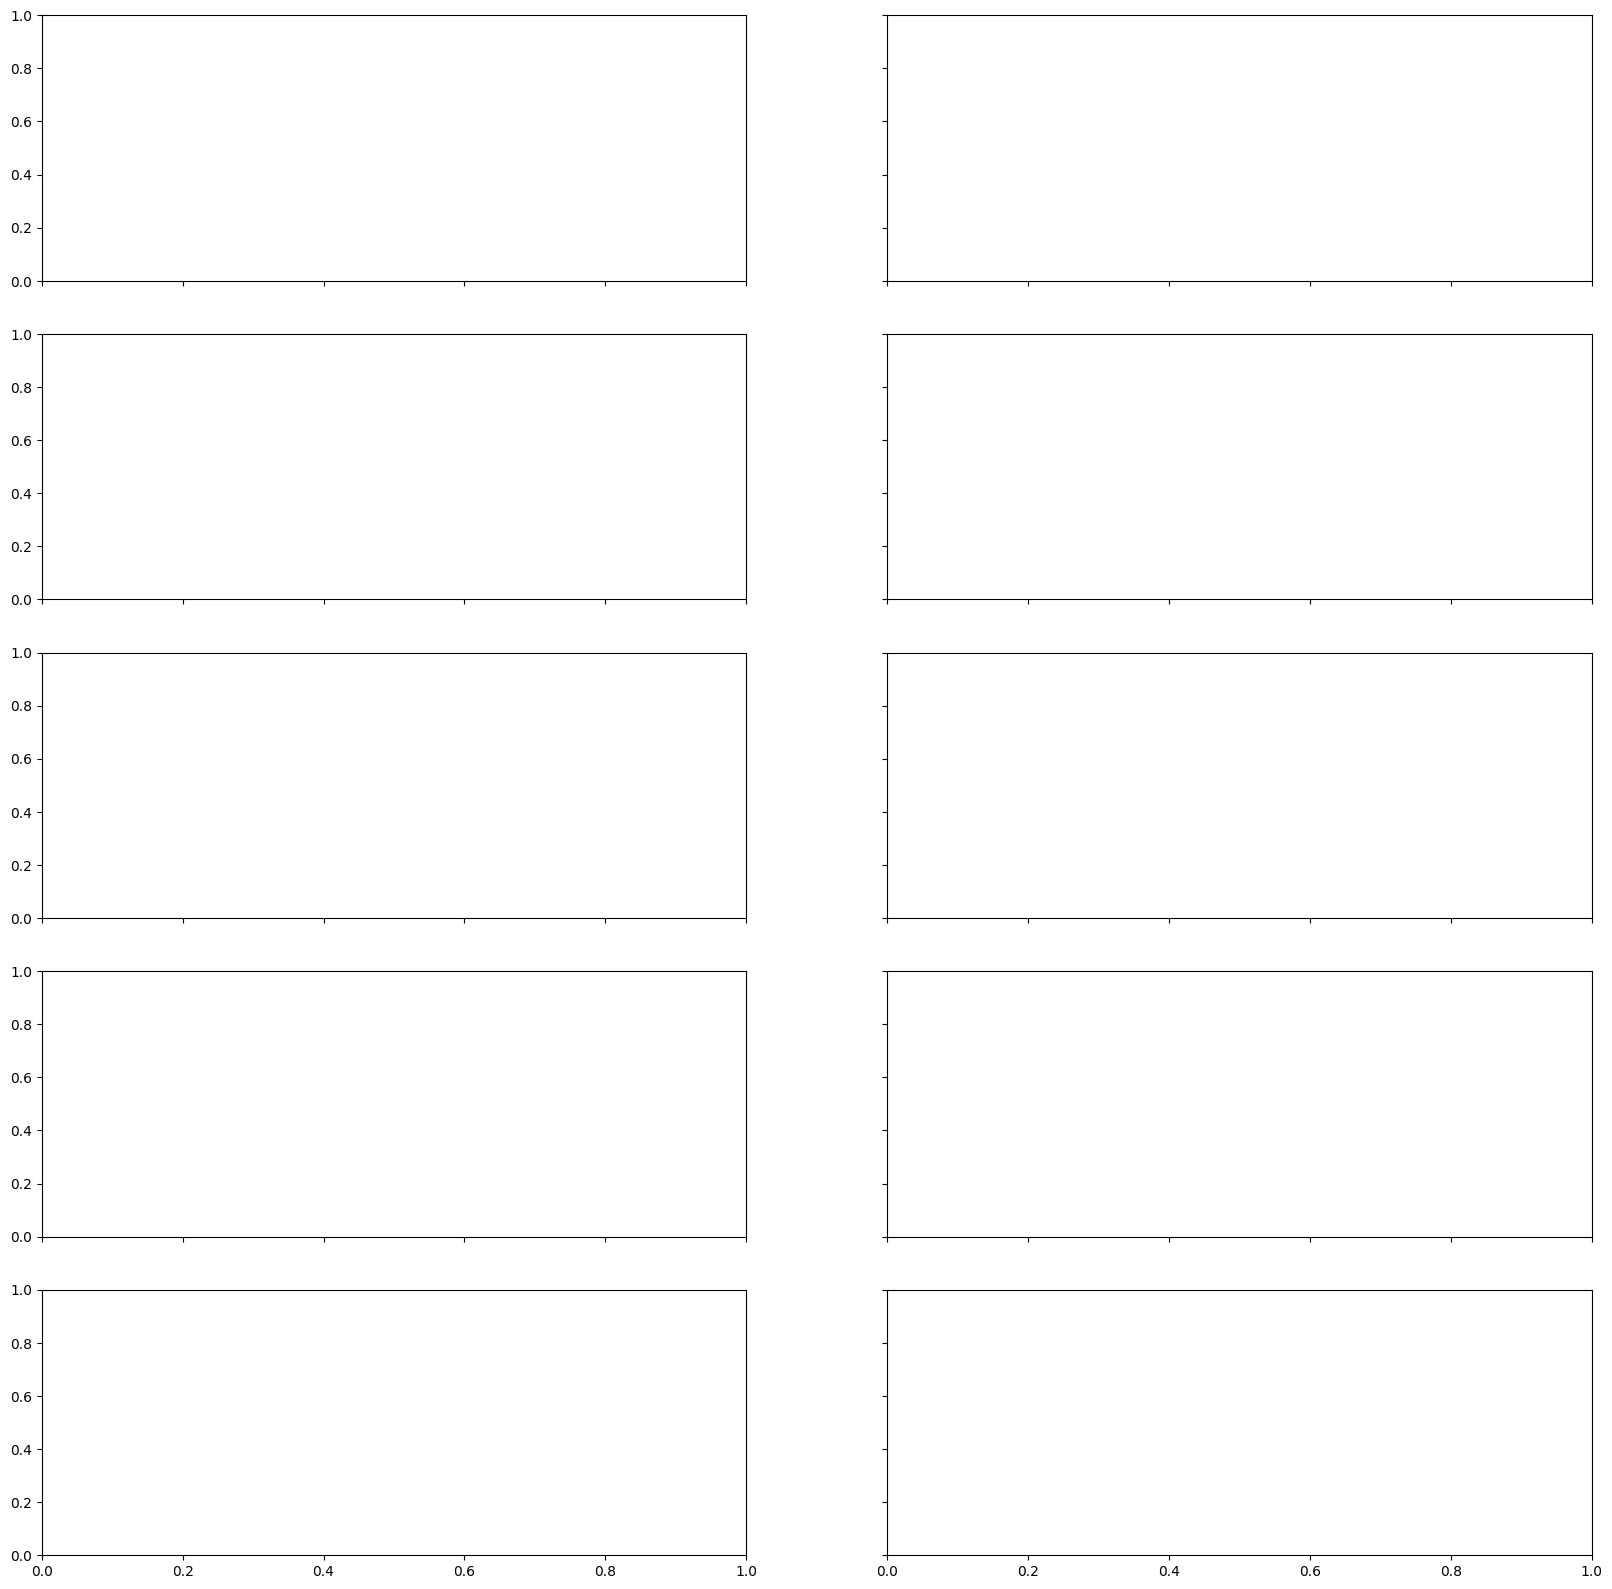

In [440]:
fig, axes = plt.subplots(5,2,figsize = (20,20), sharex = True, sharey = True)

In [442]:
for k in range(len(prediction)): 
    axes[prediction[k]//2, prediction[k]%2].plot(df_eps.iloc[k,:])

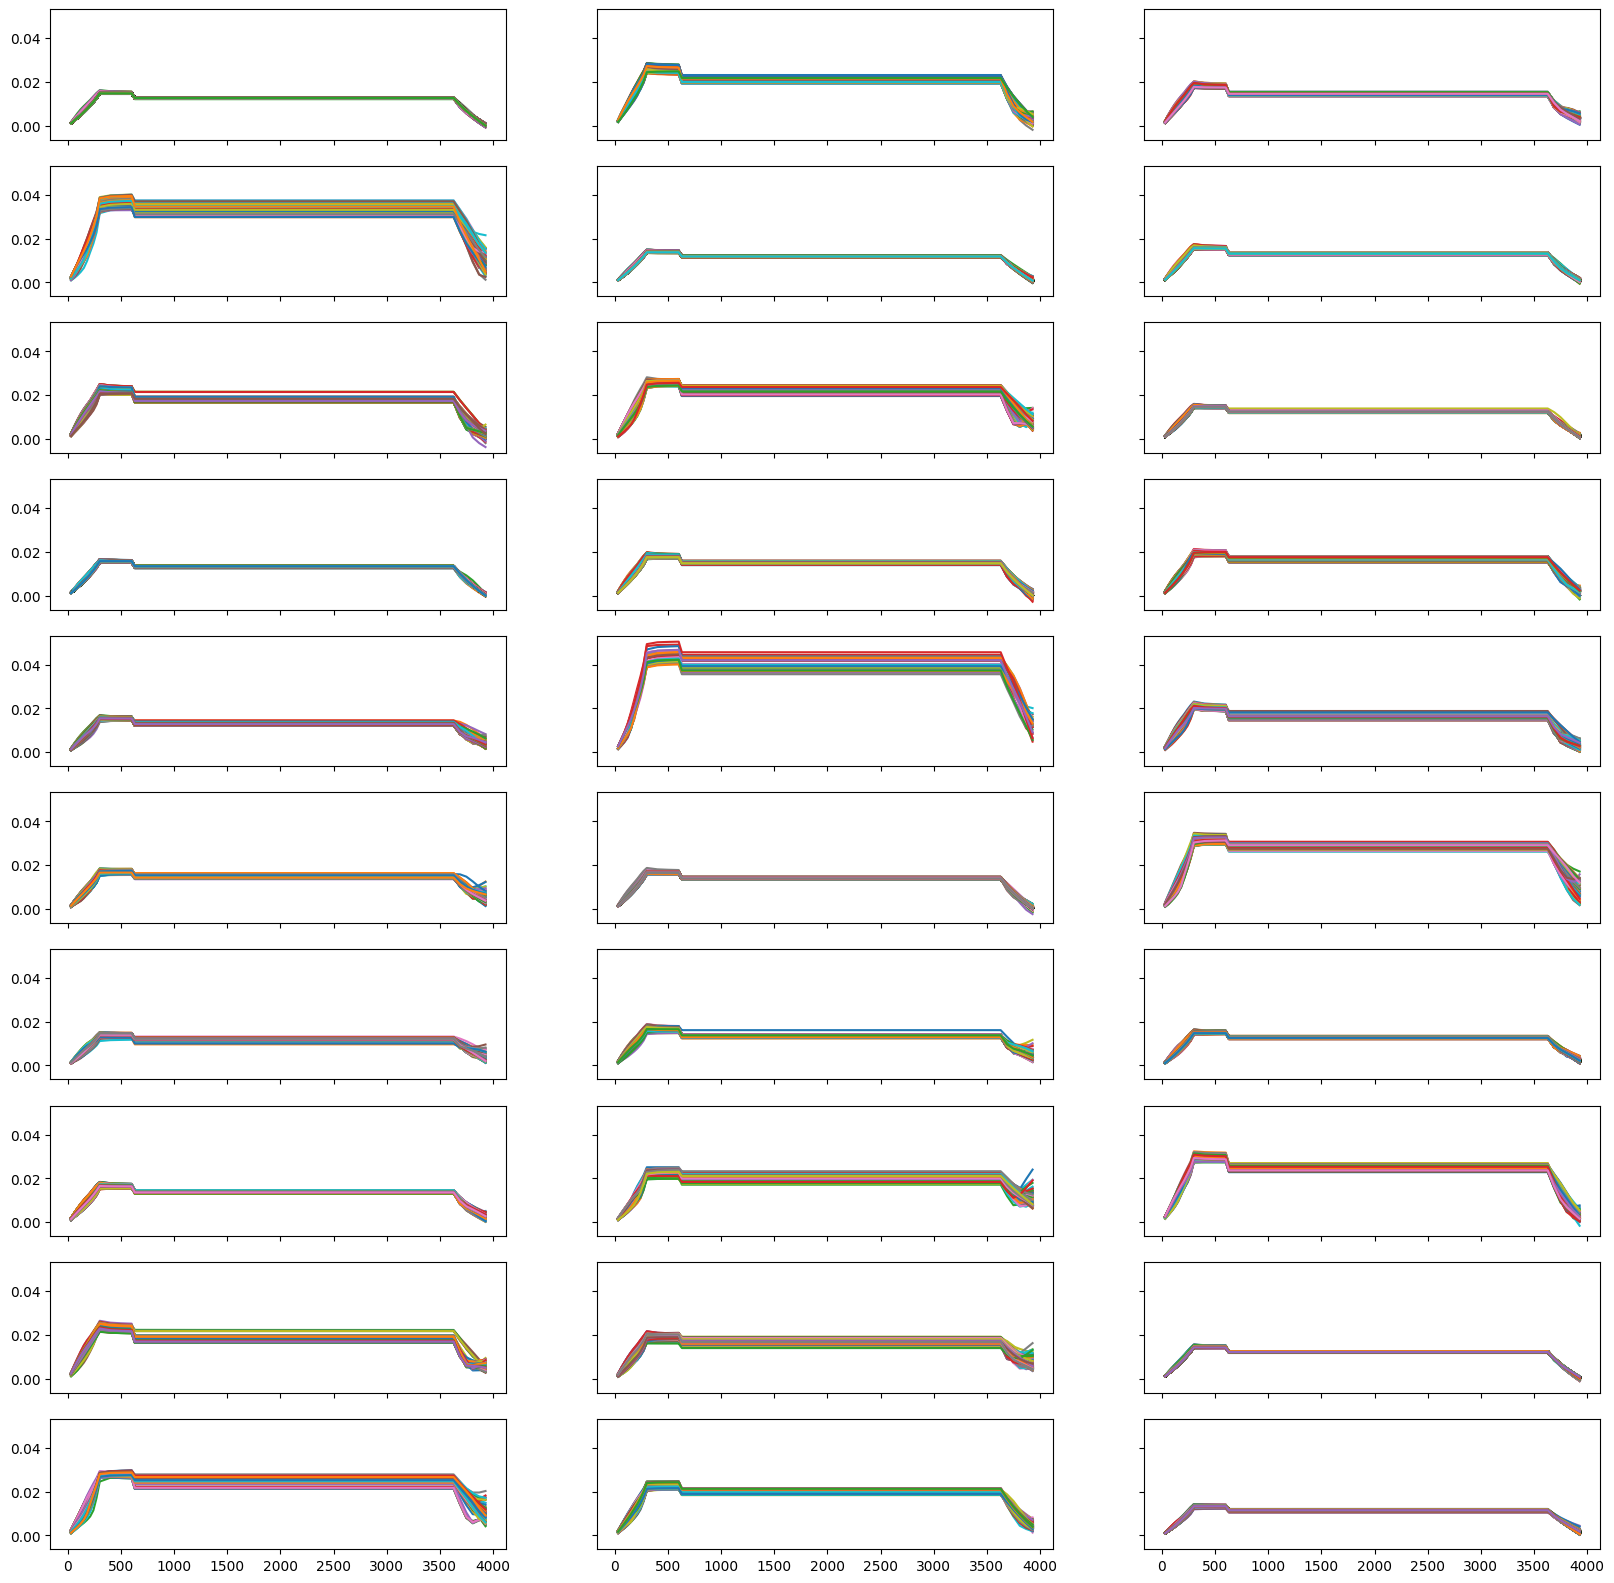

In [437]:
fig

In [443]:
with open('cluster_10.txt', 'w') as clus :
    for x in prediction : 
        clus.write(str(x) + '\n')

In [444]:
clus.close()

## Coordonnées des noeuds 

In [30]:
df = pd.read_csv('time_series/time1.txt', sep = '  ')

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_1288/2195499791.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('time_series/time1.txt', sep = '  ')


In [31]:
df

,node,X,Y,Z,gpeto11,gpeto31,gpeto33
0,31,27.125295,9.846682,-67.850000,0.001047,0.001015,0.002390
1,33,-27.347096,9.581327,-67.850000,0.002819,-0.001213,0.003056
2,43,-19.868158,5.895601,-65.438903,0.001233,-0.000228,0.004660
3,44,-17.509594,4.952852,-62.898903,0.001543,-0.000222,0.003741
4,45,-19.868158,5.895601,-61.628903,0.001268,-0.000138,0.004378
...,...,...,...,...,...,...,...
54227,2342475,26.816913,9.616926,-14.061950,0.002369,-0.000015,0.002326
54228,2342476,26.816913,9.616926,-13.801228,0.002370,-0.000015,0.002328
54229,2342523,22.057412,6.361321,-53.767238,0.001920,0.000007,0.002274
54230,2342524,21.613723,6.105231,-53.965790,0.002028,0.000011,0.002249


In [32]:
coord = df.copy()[['node', 'X', 'Y', 'Z']]

In [34]:
coord.set_index('node', inplace = True )

In [36]:
coord.describe()

,X,Y,Z
count,54232.000000,54232.000000,54232.000000
mean,-3.129368,4.298810,-36.243022
std,16.566505,2.521680,18.993212
min,-27.347096,0.976828,-67.850000
25%,-19.152495,1.809455,-52.898836
50%,-4.358311,4.436157,-36.433370
75%,10.903520,6.298100,-20.173782
max,27.125295,9.846682,0.000000


In [37]:
coord 

,X,Y,Z
node,,,
31,27.125295,9.846682,-67.850000
33,-27.347096,9.581327,-67.850000
43,-19.868158,5.895601,-65.438903
44,-17.509594,4.952852,-62.898903
45,-19.868158,5.895601,-61.628903
...,...,...,...
2342475,26.816913,9.616926,-14.061950
2342476,26.816913,9.616926,-13.801228
2342523,22.057412,6.361321,-53.767238


In [38]:
coord.to_csv('coord.csv')

In [24]:
df = pd.read_csv('Classifcation/timeSeries_classe_10.csv')

In [25]:
df2 = df.groupby('classe').get_group(0)

In [26]:
df2

,node,classe,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
10,epsilon_51,0,0.001152,0.002459,0.003766,0.005173,0.006653,0.008301,0.010057,0.011880,...,0.013600,0.013600,0.013600,0.013600,0.013600,0.010226,0.007258,0.004742,0.002561,0.000544
11,epsilon_52,0,0.001089,0.002316,0.003523,0.004796,0.006151,0.007652,0.009274,0.011022,...,0.013614,0.013614,0.013614,0.013614,0.013614,0.010496,0.007689,0.005233,0.002992,0.000948
12,epsilon_53,0,0.001110,0.002366,0.003620,0.004963,0.006380,0.007921,0.009567,0.011285,...,0.012899,0.012899,0.012899,0.012899,0.012899,0.009686,0.006860,0.004496,0.002390,0.000407
13,epsilon_54,0,0.001080,0.002291,0.003480,0.004726,0.006039,0.007483,0.009041,0.010698,...,0.012979,0.012979,0.012979,0.012979,0.012979,0.009929,0.007195,0.004832,0.002689,0.000709
14,epsilon_55,0,0.001100,0.002340,0.003576,0.004888,0.006277,0.007785,0.009374,0.011043,...,0.012590,0.012590,0.012590,0.012590,0.012590,0.009413,0.006638,0.004347,0.002275,0.000292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54224,epsilon_2342325,0,0.001164,0.002438,0.003713,0.005060,0.006502,0.008075,0.009738,0.011521,...,0.013440,0.013440,0.013440,0.013440,0.013440,0.010043,0.007126,0.004529,0.002185,0.000056
54225,epsilon_2342326,0,0.001165,0.002441,0.003717,0.005065,0.006505,0.008079,0.009741,0.011521,...,0.013437,0.013437,0.013437,0.013437,0.013437,0.010038,0.007119,0.004522,0.002186,0.000062
54226,epsilon_2342474,0,0.001128,0.002375,0.003605,0.004885,0.006222,0.007692,0.009244,0.010882,...,0.012704,0.012704,0.012704,0.012704,0.012704,0.009552,0.006792,0.004370,0.002162,0.000065
54227,epsilon_2342475,0,0.001128,0.002374,0.003603,0.004883,0.006219,0.007688,0.009240,0.010877,...,0.012697,0.012697,0.012697,0.012697,0.012697,0.009548,0.006790,0.004369,0.002162,0.000066


In [27]:
df2 = df2[['node', '300.0', '3630.0']]

In [28]:
df2.set_index('node', inplace = True)

In [34]:
df2.describe().loc[['min', 'max']]

,300.0,3630.0
min,0.01399,0.011966
max,0.01731,0.013908
